In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


In [2]:
# Step 1: Load Data
data = {
    'group': ['A'] * 1000 + ['B'] * 1000,
    'converted': np.random.binomial(1, 0.05, 1000).tolist() + np.random.binomial(1, 0.07, 1000).tolist()
}
df = pd.DataFrame(data)

In [3]:
# Step 2: Summary Statistics
conversion_rates = df.groupby('group')['converted'].mean()
counts = df.groupby('group')['converted'].agg([np.mean, np.size])
print("Conversion Rates:", conversion_rates)
print("Counts:", counts)

Conversion Rates: group
A    0.053
B    0.065
Name: converted, dtype: float64
Counts:         mean  size
group             
A      0.053  1000
B      0.065  1000


C:\Users\Luxshi\AppData\Local\Temp\ipykernel_3184\2018101710.py:3: FutureWarning: The provided callable <function mean at 0x000001F09EEA4860> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  counts = df.groupby('group')['converted'].agg([np.mean, np.size])


In [4]:
# Step 3: Hypothesis Testing
group_A = df[df['group'] == 'A']
group_B = df[df['group'] == 'B']

conv_A = group_A['converted'].mean()
conv_B = group_B['converted'].mean()

n_A = len(group_A)
n_B = len(group_B)

success_A = group_A['converted'].sum()
success_B = group_B['converted'].sum()

# Two-proportion z-test
successes = [success_A, success_B]
nobs = [n_A, n_B]

z_stat, p_value = proportions_ztest(successes, nobs)
print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: -1.138794682763669, P-value: 0.25478880009679983


In [5]:
# Step 4: Confidence Interval
standard_error = np.sqrt(conv_A * (1 - conv_A) / n_A + conv_B * (1 - conv_B) / n_B)
diff = conv_B - conv_A
confidence_interval = [diff - 1.96 * standard_error, diff + 1.96 * standard_error]
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: [-0.008646718518931763, 0.03264671851893177]


C:\Users\Luxshi\AppData\Local\Temp\ipykernel_3184\3434989210.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='group', y='converted', data=df, ci=False)


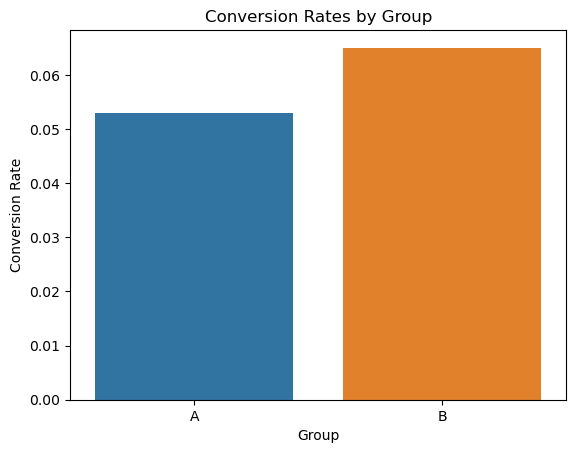

In [6]:
# Step 5: Visualization
sns.barplot(x='group', y='converted', data=df, ci=False)
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()


In [ ]:
# Step 6: Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between A and B")
else:
    print("Fail to reject the null hypothesis: No significant difference between A and B")